In [1]:
#Importing the necessary Python libraries
from __future__ import print_function

import numpy as np
import sample
from sample import material as mat
import matplotlib.pyplot as plt
from sample import SamplePlusMaterial
from run import run
from run import state
from dp import run_file
import material_list
import dp

from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider
import ipywidgets as widgets

import time
import pickle

In [2]:
#The launcher class displays a user interface to select simulation parameters, and then generates
# a run-file (based on the run_file class) that is used by the main program to run called run-file.
class launcher:
    
    #The init function declares a few variables and then calls the set parameters function.
    def __init__(self):
        self.initial_pot = 0 #Initial potential of the simulation
        self.final_pot = 0 #Final Potential of the simulation
        self.convergence = 0 #Convergence limit in the log scale (-15 means error < 10^-15).
        self.stepSize = 0 #The step size for the voltage bias increments between initial_pot and final_pot.
        self.savePath = "" #The path where the simulation run will be stored.
        self.maxIter = 0 #Max number of iterations to run if the convergence limit is not reached. 
        self.numberOfDataPoints = 0
        self.setParams() 
    
    
    #The set parameters function specifies the values of the relevant variables and calls a display_interface function
    #to make a more user friendly interface when changing these values. 
    def setParams(self):
        self.N = 51 ## The number of discrete steps in the simulation
        self.L = 120 ## The length of the sample in microns
        self.T = 300 ## The temperature in K
        N = self.N
        L = self.L
        T = self.T

        
        
        N_D = np.zeros(N) ## The dopant concentration as a function of x.
        N_A = np.zeros(N) ## The acceptor concentration as a function of x.

        
        
        

#         ##PIP Structure
        
#         t = int((N-1)/10)
        

#         N_A[0:t] = 1000
#         N_A[N-t:] = 1000 
        
#         s = 10 
#         N_A[0:t-s] = 1000
#         N_A[N-t+s:] = 1000
#         for i in range(s):
#             N_A[t-s+i] = (1-float(i)/s)*1000
#             N_A[N-t+i-1] = (float(i)/s)*1000

                    
#         N_D[t+1+s:N-t-s-1] = 3*10**-5
#         for i in range(s):
#             N_D[t+1+i] = (float(i)/s)*3*10**-5
#             N_D[N-t-2-i] = (float(i)/s)*3*10**-5
            
        ######P-N Junction
        
        t = int((N)/2)
        print(t)
        N_D[:t+1] = 1
        N_D[t+1:] = 0.0001
        N_A[t:] = 1
        N_A[:t] = 0.0001 
        
        print(N_D)
        print(N_A)
            

        
        
#         #P-I-N Junction

#         t = int((N-1)/10)
#         N_D[:t] = 1
#         N_D[t] = 0.67
#         N_D[t+1] = 0.33
#         N_D[t+2] = 0
#         N_A[N-t:] = 1
#         N_A[N-t-1] = 0.67
#         N_A[N-t-2] = 0.33
#         N_D[0:t] = 1000
#         N_D[N-t:] = 1000 
#         N_D[t] = N_D[N-t-1] = 0.8*1000
#         N_D[t+1] = N_D[N-t-2] = 0.6*1000
#         N_D[t+2] = N_D[N-t-3] = 0.4*1000
#         N_D[t+3] = N_D[N-t-4] = 0.2*1000


        self.C = N_D - N_A ## The difference which equals C
        C = self.C
        plt.plot(np.log10(N_D), label = "N_D")
        plt.plot(np.log10(N_A), label = "N_A")
        plt.legend(loc = "right")

#         plt.savefig("plots/comparisons/conncentration.png", dpi = 300)
        
        
        sampleTest = sample.Sample(N, L, T, C)
        materialTest = material_list.GaN
        self.mat = material_list.GaN
        
        
        
        d = dp.display_launcher(N, L, T, C, self.mat)

     
    
    #This function calls run_file class and its function to generate the run file.
    


25
[1.e+00 1.e+00 1.e+00 1.e+00 1.e+00 1.e+00 1.e+00 1.e+00 1.e+00 1.e+00
 1.e+00 1.e+00 1.e+00 1.e+00 1.e+00 1.e+00 1.e+00 1.e+00 1.e+00 1.e+00
 1.e+00 1.e+00 1.e+00 1.e+00 1.e+00 1.e+00 1.e-04 1.e-04 1.e-04 1.e-04
 1.e-04 1.e-04 1.e-04 1.e-04 1.e-04 1.e-04 1.e-04 1.e-04 1.e-04 1.e-04
 1.e-04 1.e-04 1.e-04 1.e-04 1.e-04 1.e-04 1.e-04 1.e-04 1.e-04 1.e-04
 1.e-04]
[1.e-04 1.e-04 1.e-04 1.e-04 1.e-04 1.e-04 1.e-04 1.e-04 1.e-04 1.e-04
 1.e-04 1.e-04 1.e-04 1.e-04 1.e-04 1.e-04 1.e-04 1.e-04 1.e-04 1.e-04
 1.e-04 1.e-04 1.e-04 1.e-04 1.e-04 1.e+00 1.e+00 1.e+00 1.e+00 1.e+00
 1.e+00 1.e+00 1.e+00 1.e+00 1.e+00 1.e+00 1.e+00 1.e+00 1.e+00 1.e+00
 1.e+00 1.e+00 1.e+00 1.e+00 1.e+00 1.e+00 1.e+00 1.e+00 1.e+00 1.e+00
 1.e+00]


RadioButtons(description='New Simulation?', layout=Layout(width='60%'), options=('Yes', 'No, continue from a p…

Button(description='Next', style=ButtonStyle())

Output()

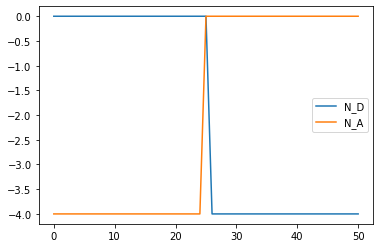

In [3]:
test_interface = launcher() 
